In [62]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import re

ROOT_DIRECTORY = "../../"
BASE_DIRECTORY = f"{ROOT_DIRECTORY}/results/intra-zone-single-stream-latency/packet-size/"
SECURE_DIRECTORY = f"{BASE_DIRECTORY}/secure/"
INSECURE_DIRECTORY = f"{BASE_DIRECTORY}/insecure/"


def get_packet_sizes():
    # Assumes the sizes are the same between secure, insecure 
    # directories!
    # Directory names are of the form 'size-128', and so on.
    directories = os.listdir(SECURE_DIRECTORY)
    return sorted(
        [int(re.search(r"size-([0-9]+)", directory)[1]) 
         for directory in directories]
    )


def get_average_latency(file_csv):
    df = pd.read_csv(file_csv)
    latencies = df['delay']
    return latencies.mean()


def get_secure_latencies(packet_sizes):
    return np.array([get_average_latency(f"{SECURE_DIRECTORY}/size-{packet_size}/stream.csv")
                    for packet_size in packet_sizes])


def get_insecure_latencies(packet_sizes):
    return np.array([get_average_latency(f"{INSECURE_DIRECTORY}/size-{packet_size}/stream.csv")
                    for packet_size in packet_sizes])


packet_sizes = get_packet_sizes()
secure_latencies = get_secure_latencies(packet_sizes)
insecure_latencies = get_insecure_latencies(packet_sizes)

print(f"PACKET SIZES:\t{packet_sizes}")
print(f"SECURE LATENCIES:\t{secure_latencies}")
print(f"INSECURE_LATENCIES:\t{insecure_latencies}")




PACKET SIZES:	[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450]
SECURE LATENCIES:	[1.53940899e-05 2.33941798e-05 3.13942697e-05 3.93943596e-05
 4.73944496e-05 5.53945394e-05 6.33946293e-05 7.13947194e-05
 7.93948091e-05 8.73948993e-05 9.53949891e-05 1.03395079e-04
 1.11395170e-04 1.19395259e-04 1.27395350e-04 1.35395439e-04
 1.43395529e-04 1.51395618e-04 1.59395709e-04 1.67395799e-04
 1.75395890e-04 1.83395980e-04 1.91396070e-04 1.99396160e-04
 2.07396252e-04 2.15396342e-04 2.23396427e-04 2.31396519e-04
 2.39396611e-04]
INSECURE_LATENCIES:	[1.53640899e-05 2.33641798e-05 3.13642697e-05 3.93643596e-05
 4.73644496e-05 5.53645394e-05 6.33646293e-05 7.13647194e-05
 7.93648091e-05 8.73648993e-05 9.53649891e-05 1.03365079e-04
 1.11365170e-04 1.19365259e-04 1.27365350e-04 1.35365439e-04
 1.43365529e-04 1.51365618e-04 1.59365709e-04 1.67365799e-04
 1.75365890e-04 1.83365980e-04 1.91366070e-0

<Figure size 1280x960 with 0 Axes>

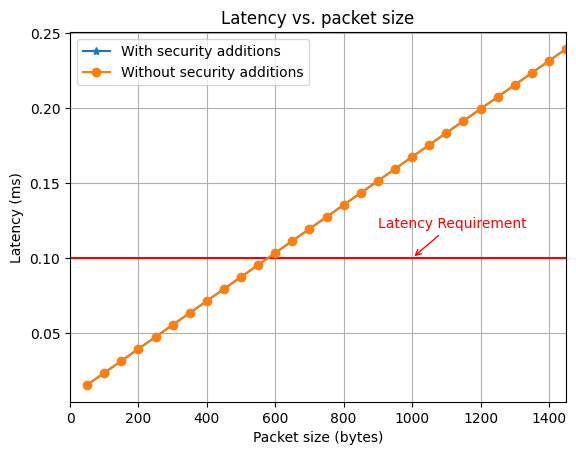

In [63]:
plt.figure(dpi=200)
fig, ax = plt.subplots()

ax.axhline(0.1, color='red')
ax.plot(packet_sizes, secure_latencies * 1000, '*-', label="With security additions")
ax.plot(packet_sizes, insecure_latencies * 1000, 'o-', label="Without security additions")
ax.annotate("Latency Requirement", xy=(1000, 0.10), xytext=(900, 0.12),
             color='red',
             arrowprops=dict(arrowstyle='->', color='red'))
ax.set_xlabel("Packet size (bytes)")
ax.set_ylabel("Latency (ms)")
ax.set_title("Latency vs. packet size")
ax.set_xbound(0, max(packet_sizes))
ax.grid()
ax.legend()
plt.show()

fig.savefig(f"{BASE_DIRECTORY}/graph.png")